In [1]:
import bacteriopop_utils
import feature_selection_utils
import load_data
import dynamic_mode_decomposition as dmd
import network_construction as net
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
import matplotlib as mpl

In [3]:
mpl.rcParams.update({
    'font.size': 18, 'axes.titlesize': 20, 'axes.labelsize': 15,
    'xtick.labelsize': 15, 'ytick.labelsize': 15,
    #'font.family': 'Lato',  # I don't have this font family
        'font.weight': 600,
    'axes.labelweight': 600, 'axes.titleweight': 600,
    #'figure.autolayout': True  # screws up layout for seaborn facetgrid objects. 
    })

In [4]:
#Calculation parameters:
p = 1  # percent abundance to consider significant. 
adjacency_magnitude = 1.5 # signal to trim by before plotting

In [5]:
# Only look for bacteria who are p% of the population in at least 1 sample. 
mappings, nodes = dmd.find_fixed_adjacency_matrix(p/100,'order',True)

all groups of oxygen/week/replicate have abundances that sum to 1
columns after aggregating on phylo level: Index([u'oxygen', u'replicate', u'week', u'kingdom', u'phylum', u'class',
       u'order', u'abundance'],
      dtype='object')


In [6]:
# Only pull out species that have interactions with another member with magnitude greater than 0.5
mappings, nodes = net.reduce_all_adjacency_matrixes_in_dict(mappings, nodes, 
                                                            adjacency_magnitude)

network_construction.py:106: ComplexWarning: Casting complex values to real discards the imaginary part
  new_adj[i][j] = adj[node1][node2]


In [7]:
# Convert all of the dataframes to Pandas
mappings = dmd.DMD_results_dict_from_numpy_to_pandas(mappings,nodes)
# Depreciated: aggregate_adjacency_matrix_over_replicates  
# std_mappings, avg_mappings, snr_mappings = dmd.aggregate_adjacency_matrix_over_replicates(mappings)

# Aggregate using pd.Panel

In [8]:
plot_dir = './plots/poster'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [9]:
mappings.keys()

[('High', 4),
 ('Low', 1),
 ('High', 3),
 ('Low', 2),
 ('High', 2),
 ('Low', 3),
 ('High', 1),
 ('Low', 4)]

In [10]:
# mappings, nodes
low_agg = net.aggregate_adjacency_matrices([
        mappings[('Low', 1)],
        mappings[('Low', 2)],
        mappings[('Low', 3)],
        mappings[('Low', 4)]
    ])

In [11]:
low_agg.keys()

['standard deviation', 'mean']

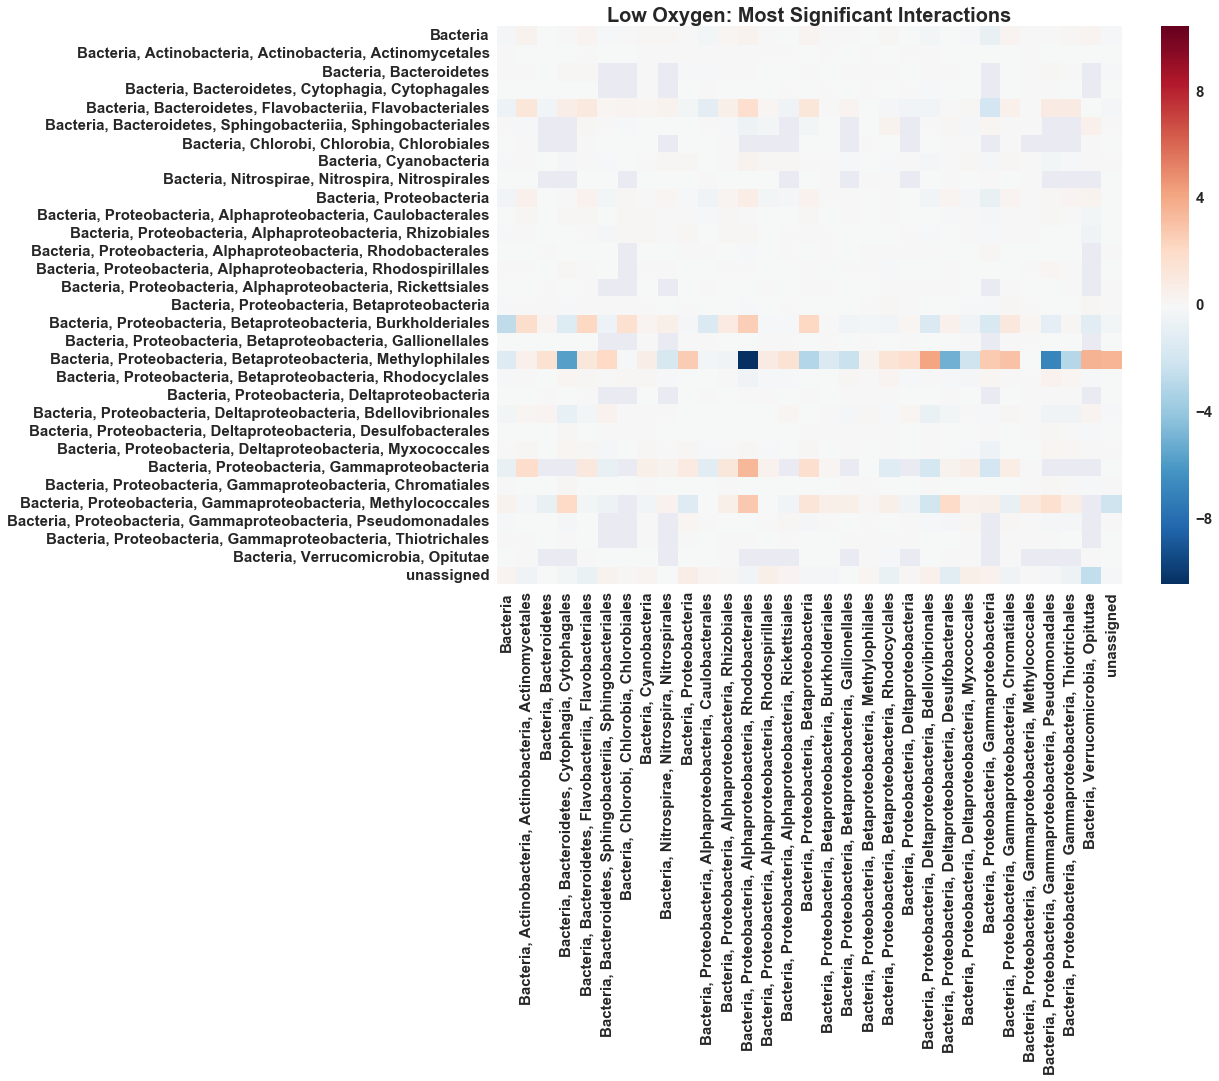

In [12]:
p_low = net.plot_heatmap(low_agg['mean'], 
                         'Low Oxygen: Most Significant Interactions', 
                         './plots/poster/low_avg--FROM_PANELS', 
                         file_type='.png',
                         width=14, height=10) 

In [13]:
# mappings, nodes
high_agg = net.aggregate_adjacency_matrices([
        mappings[('High', 1)],
        mappings[('High', 2)],
        mappings[('High', 3)],
        mappings[('High', 4)]
    ])

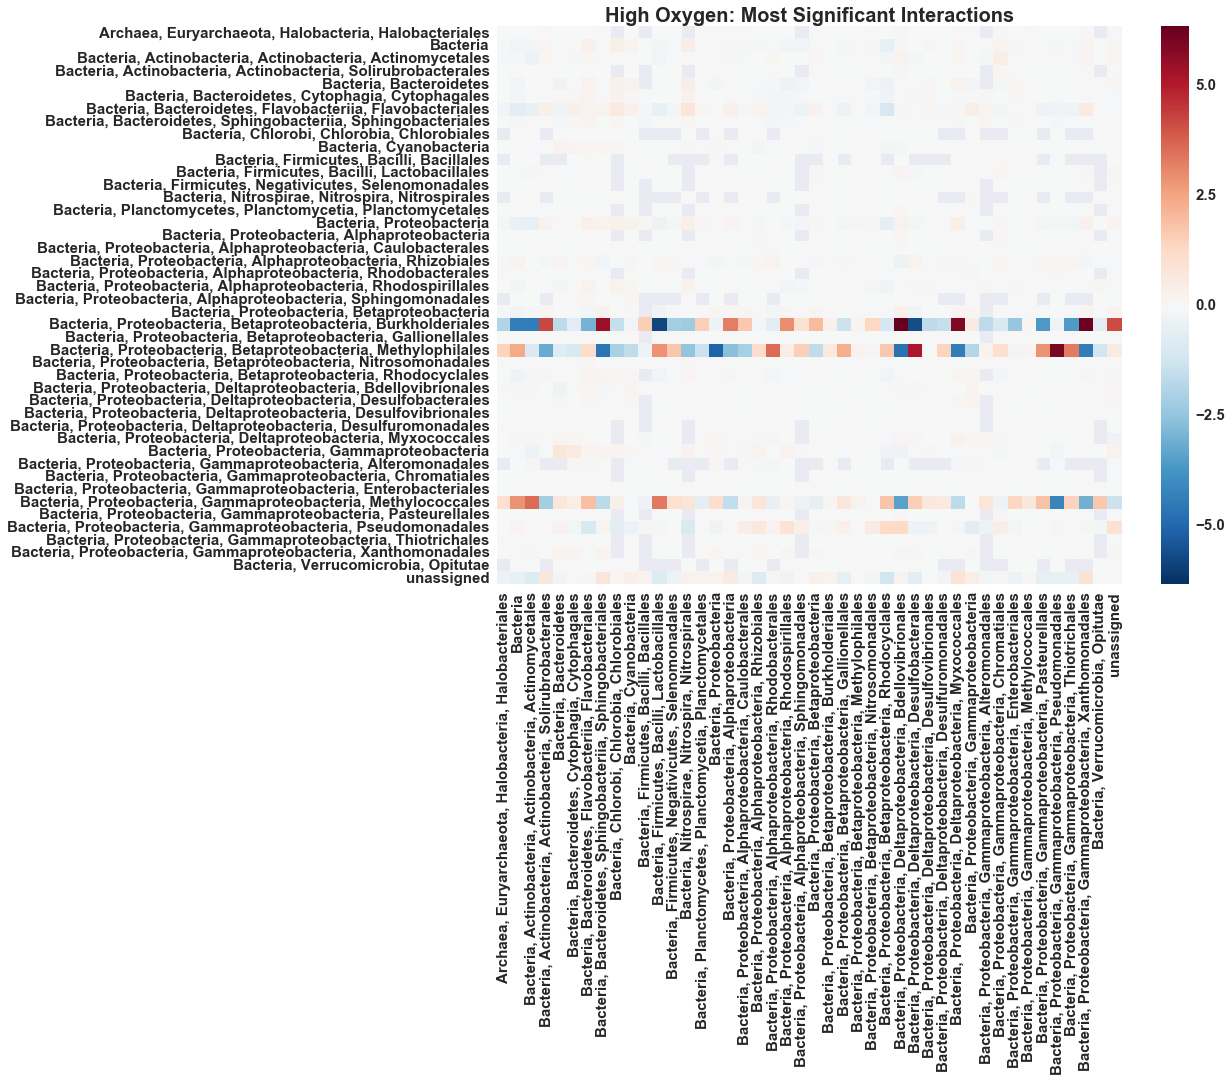

In [14]:
p_high = net.plot_heatmap(high_agg['mean'], 
                          'High Oxygen: Most Significant Interactions', 
                          './plots/poster/high_avg--FROM_PANELS', 
                         file_type='.png',
                width=14, height=10) 

In [15]:
aggregated_results_Panels = \
    net.summarize_replicate_adjacency_matrices(mappings)

In [16]:
aggregated_results_Panels.keys()

['high', 'Low']